<a href="https://colab.research.google.com/github/Shreyansh1218/internorbit/blob/main/TITANICPREDICTIONipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
def set_data_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black')


sns.set_style("darkgrid")
sns.set_palette("pastel")

In [ ]:
import kagglehub

path = kagglehub.dataset_download("shabukc/titanic-survival-prediction")

print("Path to dataset files:", path)

100%|██████████| 34.1k/34.1k [00:00<00:00, 20.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shabukc/titanic-survival-prediction/versions/1


In [ ]:
# Load the training dataset
train_df = pd.read_csv('train.csv')

# Load the testing dataset
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.shape

(891, 12)

In [ ]:
test_df.shape

(418, 11)

In [ ]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


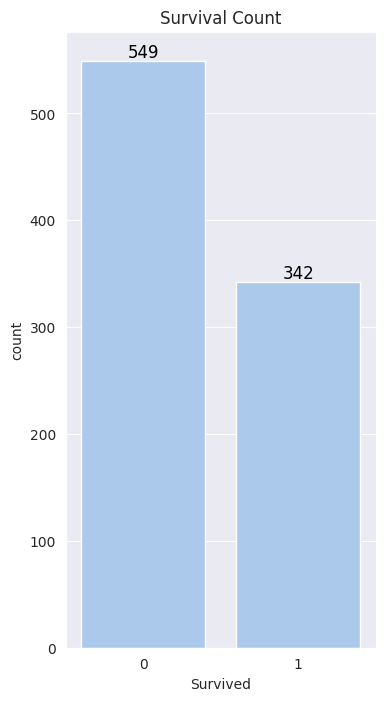

In [ ]:
plt.figure(figsize=(4, 8))
ax = sns.countplot(x='Survived', data=train_df)
set_data_labels(ax)
plt.title('Survival Count')
plt.show()

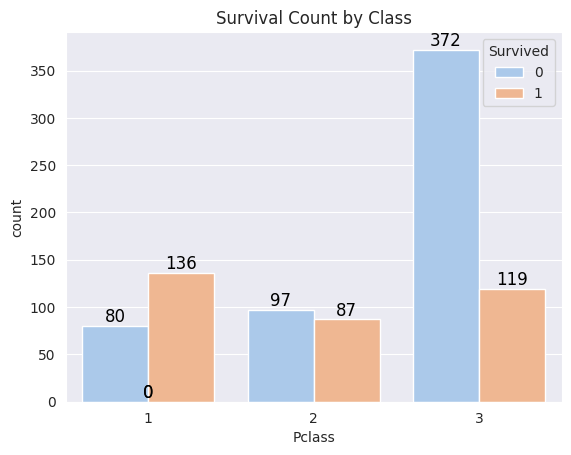

In [ ]:
ax = sns.countplot(x='Pclass', hue='Survived', data=train_df)
set_data_labels(ax)
plt.title('Survival Count by Class')
plt.show()

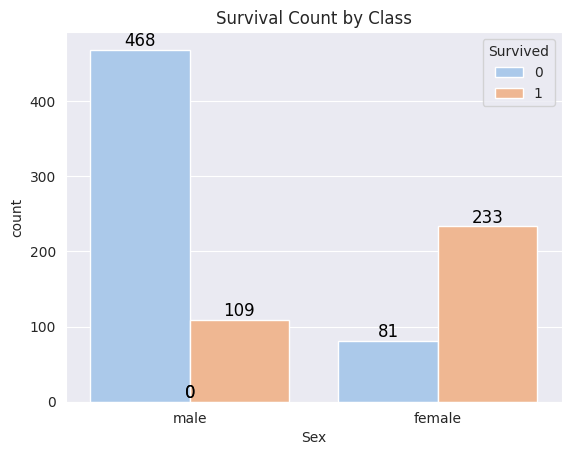

In [ ]:
ax = sns.countplot(x='Sex', hue='Survived', data=train_df)
set_data_labels(ax)
plt.title('Survival Count by Class')
plt.show()

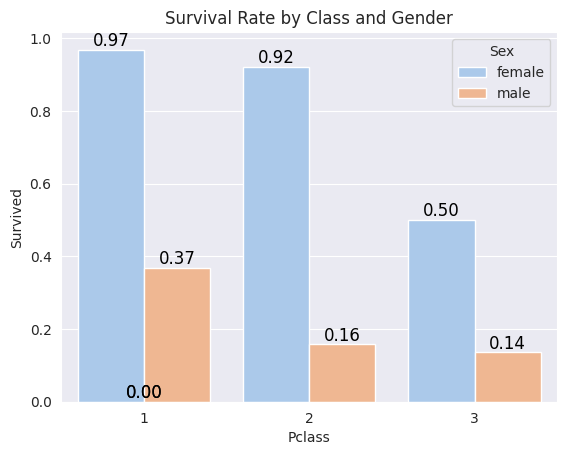

In [ ]:
ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df, errorbar=None)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Survival Rate by Class and Gender')
plt.show()

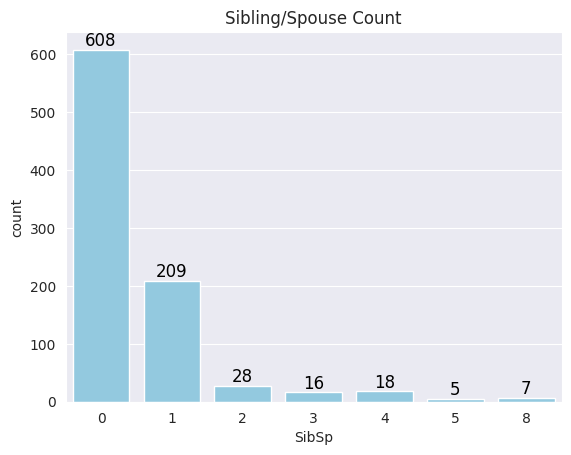

In [ ]:
ax = sns.countplot(x='SibSp', data=train_df, color='skyblue')
set_data_labels(ax)
plt.title('Sibling/Spouse Count')
plt.show()

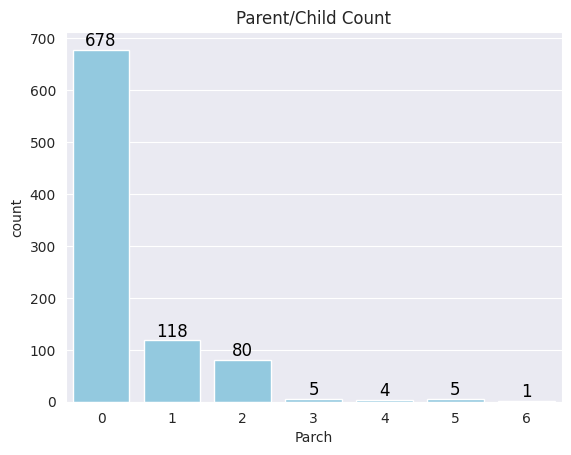

In [ ]:
ax = sns.countplot(x='Parch', data=train_df, color='skyblue')
set_data_labels(ax)
plt.title('Parent/Child Count')
plt.show()

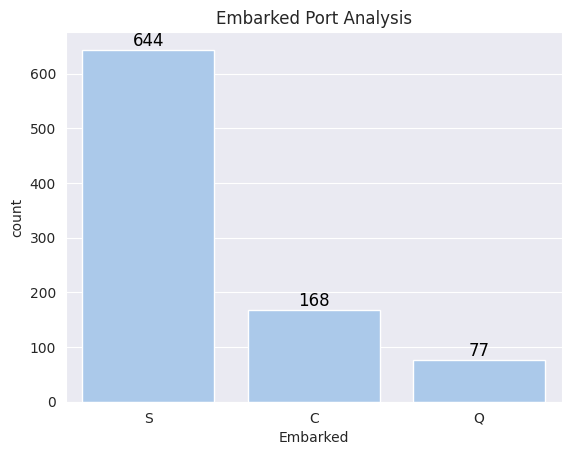

In [ ]:
ax = sns.countplot(x='Embarked', data=train_df)
set_data_labels(ax)
plt.title('Embarked Port Analysis')
plt.show()

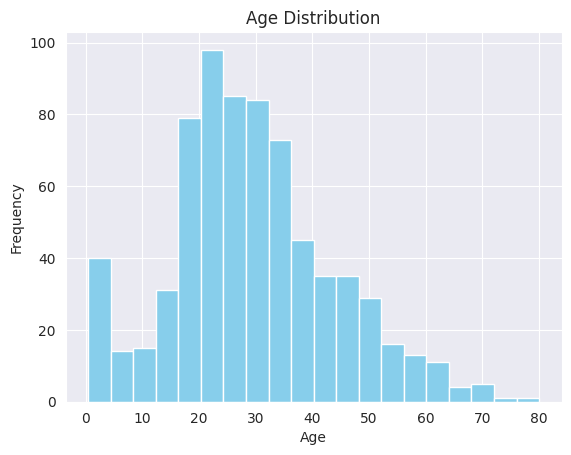

In [ ]:
plt.hist(train_df['Age'].dropna(), bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

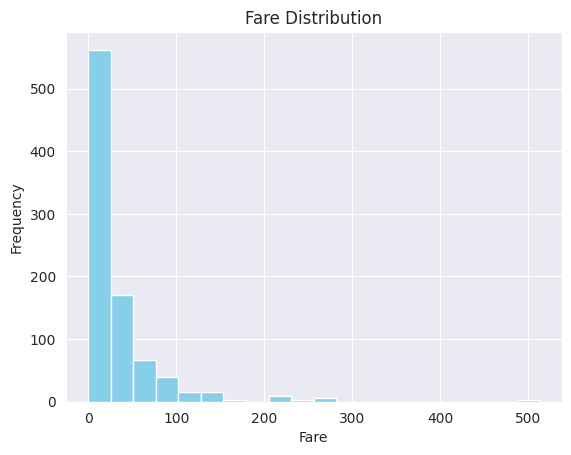

In [ ]:
plt.hist(train_df['Fare'], bins=20, color='skyblue')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

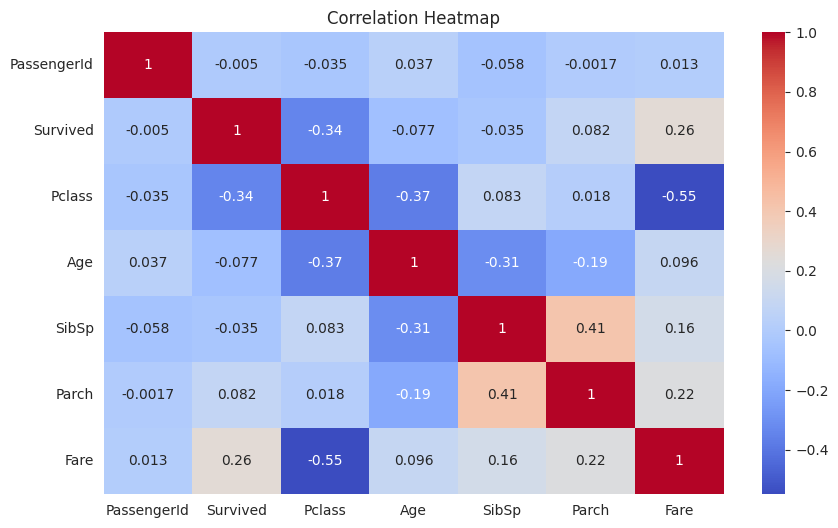

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
average_train_age = int(train_df['Age'].mean())
train_df['Age'].fillna(average_train_age, inplace=True)

average_test_age = int(train_df['Age'].mean())
test_df['Age'].fillna(average_test_age, inplace=True)

<ipython-input-33-179f2695cbc2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(average_train_age, inplace=True)
<ipython-input-33-179f2695cbc2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
train_df.dropna(subset=['Embarked', 'Fare'], inplace=True)
test_df.dropna(subset=['Embarked', 'Fare'], inplace=True)

In [ ]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

In [ ]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

bins = [0, 18, 30, 50, 80]
labels = ['Child', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, include_lowest=True).astype(str)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels, include_lowest=True).astype(str)

train_df['FarePerPerson'] = train_df['Fare'] / train_df['FamilySize']
test_df['FarePerPerson'] = test_df['Fare'] / test_df['FamilySize']

train_df['AgeClassInteraction'] = train_df['Age'] * train_df['Pclass']
test_df['AgeClassInteraction'] = test_df['Age'] * test_df['Pclass']

train_df['FareClassInteraction'] = train_df['Fare'] * train_df['Pclass']
test_df['FareClassInteraction'] = test_df['Fare'] * test_df['Pclass']

train_df['AgeGroupClassInteraction'] = train_df['AgeGroup'] + '_' + train_df['Pclass'].astype(str)
test_df['AgeGroupClassInteraction'] = test_df['AgeGroup'] + '_' + test_df['Pclass'].astype(str)

In [ ]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Title', 'AgeGroup', 'AgeGroupClassInteraction'], drop_first=True)
X = train_df.drop(['Survived', 'PassengerId', 'Name'], axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lg_model = LogisticRegression(max_iter=1500)
lg_model.fit(X_train, y_train)
lg_pred = lg_model.predict(X_test)
lg_accuracy = accuracy_score(y_test, lg_pred)
lg_report = classification_report(y_test, lg_pred)

print(f'Logistic Regression Accuracy: {lg_accuracy:.2f}')
print(f'Logistic Regression Report:\n{lg_report}')

Logistic Regression Accuracy: 0.82
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.75      0.80      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.82      0.82      0.82       178



In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(f'Random Forest Report:\n{rf_report}')

Random Forest Accuracy: 0.78
Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       109
           1       0.70      0.74      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)

print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'SVM Report:\n{svm_report}')

SVM Accuracy: 0.72
SVM Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       109
           1       0.70      0.51      0.59        69

    accuracy                           0.72       178
   macro avg       0.72      0.68      0.69       178
weighted avg       0.72      0.72      0.71       178



In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_report = classification_report(y_test, gb_pred)

print(f'Gradient Boosting Accuracy: {gb_accuracy:.2f}')
print(f'Gradient Boosting Report:\n{gb_report}')

Gradient Boosting Accuracy: 0.79
Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



In [ ]:
data = {
    'PassengerId': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pclass': [3, 1, 2, 1, 2, 3, 3, 1, 2, 3],
    'Name': [
        'Doe, Mr. John',
        'Smith, Mrs. Jane',
        'Johnson, Miss. Sarah',
        'Brown, Mr. Michael',
        'Davis, Miss. Laura',
        'Clark, Mr. James',
        'Evans, Mrs. Emily',
        'Lee, Mr. David',
        'Hall, Mr. Thomas',
        'Baker, Miss. Jessica'
    ],
    'Sex': ['male', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'female'],
    'Age': [30.0, 35.0, 20.0, 45.0, 25.0, 28.0, 35.0, 40.0, 50.0, 22.0],
    'SibSp': [0, 1, 1, 0, 1, 0, 0, 1, 0, 1],
    'Parch': [0, 1, 1, 1, 0, 0, 2, 2, 1, 0],
    'Fare': [8.0, 80.0, 20.0, 120.0, 30.0, 10.0, 40.0, 200.0, 50.0, 15.0],
    'Embarked': ['S', 'C', 'S', 'C', 'Q', 'S', 'S', 'C', 'S', 'S'],
    'Title': ['Mr', 'Mrs', 'Miss', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Miss'],
    'FamilySize': [1, 3, 3, 2, 1, 1, 3, 4, 2, 2],
    'IsAlone': [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    'AgeGroup': ['Adult', 'Adult', 'Young Adult', 'Adult', 'Young Adult', 'Young Adult', 'Adult', 'Adult', 'Senior', 'Young Adult'],
    'FarePerPerson': [8.0, 40.0, 10.0, 60.0, 30.0, 10.0, 13.33, 50.0, 25.0, 7.5],
    'AgeClassInteraction': [90.0, 35.0, 40.0, 45.0, 50.0, 84.0, 105.0, 40.0, 100.0, 66.0],
    'FareClassInteraction': [24.0, 80.0, 40.0, 120.0, 60.0, 30.0, 80.0, 200.0, 100.0, 45.0],
    'AgeGroupClassInteraction': ['Adult_3', 'Adult_1', 'Young Adult_2', 'Adult_1', 'Young Adult_2', 'Young Adult_3', 'Adult_3', 'Adult_1', 'Senior_1', 'Young Adult_3']
}
new_data = pd.DataFrame(data)

In [ ]:
X_new = new_data.drop(['PassengerId', 'Name'], axis=1)
X_new = pd.get_dummies(X_new, columns=['Sex', 'Embarked', 'Title', 'AgeGroup'], drop_first=True)
missing_columns = set(X.columns) - set(X_new.columns)
for col in missing_columns:
    X_new[col] = 0
X_new = X_new[X.columns]
predictions = lg_model.predict(X_new)
new_data['PredictedSurvived'] = predictions
new_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgeGroup,FarePerPerson,AgeClassInteraction,FareClassInteraction,AgeGroupClassInteraction,PredictedSurvived
0,1,3,"Doe, Mr. John",male,30.0,0,0,8.0,S,Mr,1,1,Adult,8.00,90.0,24.0,Adult_3,0
1,2,1,"Smith, Mrs. Jane",female,35.0,1,1,80.0,C,Mrs,3,0,Adult,40.00,35.0,80.0,Adult_1,1
2,3,2,"Johnson, Miss. Sarah",female,20.0,1,1,20.0,S,Miss,3,0,Young Adult,10.00,40.0,40.0,Young Adult_2,1
3,4,1,"Brown, Mr. Michael",male,45.0,0,1,120.0,C,Mr,2,0,Adult,60.00,45.0,120.0,Adult_1,1
4,5,2,"Davis, Miss. Laura",female,25.0,1,0,30.0,Q,Miss,1,1,Young Adult,30.00,50.0,60.0,Young Adult_2,1
5,6,3,"Clark, Mr. James",male,28.0,0,0,10.0,S,Mr,1,1,Young Adult,10.00,84.0,30.0,Young Adult_3,0
6,7,3,"Evans, Mrs. Emily",female,35.0,0,2,40.0,S,Mrs,3,0,Adult,13.33,105.0,80.0,Adult_3,1
7,8,1,"Lee, Mr. David",male,40.0,1,2,200.0,C,Mr,4,0,Adult,50.00,40.0,200.0,Adult_1,1
8,9,2,"Hall, Mr. Thomas",male,50.0,0,1,50.0,S,Mr,2,0,Senior,25.00,100.0,100.0,Senior_1,0
9,10,3,"Baker, Miss. Jessica",female,22.0,1,0,15.0,S,Miss,2,0,Young Adult,7.50,66.0,45.0,Young Adult_3,1
